# Titanic prediction with logistic regression

### import essential libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**reading data**

In [2]:
df = pd.read_csv('../input/traintitanic/train.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### dropping some unimportant columns
it is clear passangerid, name and ticket doesn't have any effect on the result, so wise action is just to delete them.

In [4]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [5]:
df.shape

(891, 9)

## getting null-values
**one of the most important sections, dealing with missing data!**

getting info and sum of nulls will help us detect null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
(df.isna().sum() / len(df)).sort_values()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
Age         0.198653
Cabin       0.771044
dtype: float64

it is obvious we don't need cabin to:

more than 75 percent null values and the attribute itself make keeping it costly and illogical

In [8]:
df = df.drop('Cabin', axis=1)

1. age is important feature and can be very important for our predicton, so we just fill it with mean of values
2. fare null values rate is less than 0.5%, so we just drop them! 

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
df = df.dropna()

In [11]:
(df.isna().sum() / len(df)).sort_values()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

## Some extra Analysis

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


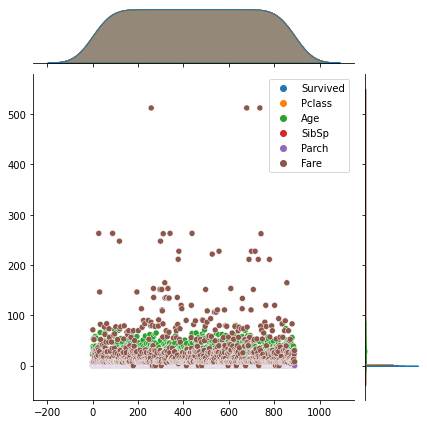

In [13]:
sns.jointplot(data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

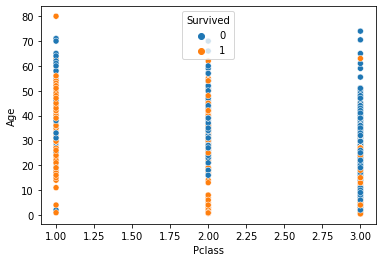

In [14]:
sns.scatterplot(data=df, x='Pclass', y='Age', hue='Survived')

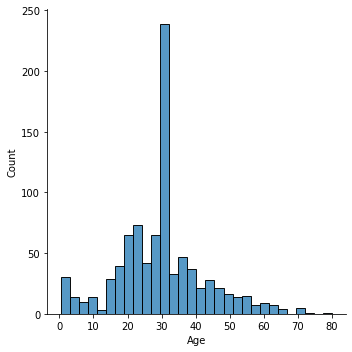

In [15]:
sns.displot(data=df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

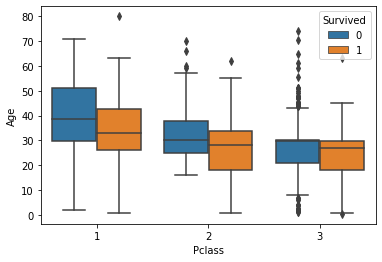

In [16]:
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


### dividing data frame to apply dummy variables 

In [18]:
df_num = df.select_dtypes(exclude=object)
df_str = df.select_dtypes(include=object)

#### finally concatenation to create our final data frame

In [19]:
df_str = pd.get_dummies(df_str, drop_first=True)
final_df = pd.concat([df_str, df_num], axis=1)
df_str.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [66]:
final_df.head()


,Sex_male,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,35.0,1,0,53.1000
4,1,0,1,0,3,35.0,0,0,8.0500


#### converting our dataframe to csv file to use in other notebooks

In [65]:
final_df.to_csv('final-df.csv')

#### creating X and y

In [22]:
X = final_df.drop('Survived', axis=1)
y = final_df['Survived']

### preprocess the data

In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#### splitting X and y to train and test data 

In [45]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=42)

## Model Building, Training and Evaluating 

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42, C=0.01)
model.fit(train_x, train_y)
model.coef_

array([[-0.67457289, -0.02134813, -0.13034745, -0.38669418, -0.18558032,
        -0.13135165, -0.00178074,  0.15729882]])

In [58]:
yhat = model.predict(test_x)
yhat_train = model.predict(train_x)

### getting confusion matrix, recall score, accuracy score and classification report

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
print('accuracy for test set %f' % accuracy_score(test_y, yhat))
print('accuracy for train set %f' % accuracy_score(train_y, yhat_train))

accuracy for test set 0.813433
accuracy for train set 0.788079


In [34]:
confusion_matrix(test_y, yhat)

array([[70, 17],
       [10, 37]])

In [29]:
recall_score(test_y, yhat)

0.7872340425531915

In [30]:
classification_report(test_y, yhat)

'              precision    recall  f1-score   support\n\n           0       0.88      0.80      0.84        87\n           1       0.69      0.79      0.73        47\n\n    accuracy                           0.80       134\n   macro avg       0.78      0.80      0.79       134\nweighted avg       0.81      0.80      0.80       134\n'

### plotting precision-recall-curve, roc-curve

In [67]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [68]:
precision_recall_curve(test_y, yhat)

(array([0.35074627, 0.72      , 1.        ]),
 array([1.        , 0.76595745, 0.        ]),
 array([0, 1]))

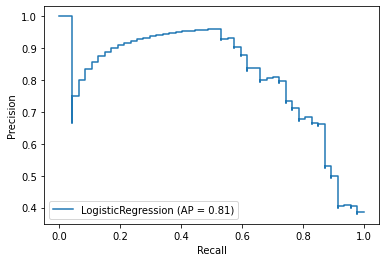

In [76]:
plot_precision_recall_curve(model, test_x, test_y)

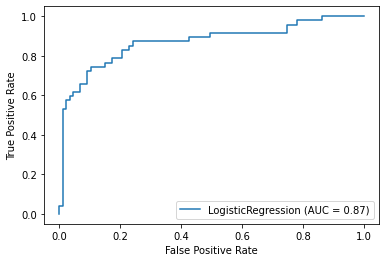

In [77]:
plot_roc_curve(model, test_x, test_y)